# Titanic challenge competition #
## Part 1: Exploration of training dataset ##

Titanic challenge problem (https://www.kaggle.com/c/titanic/) offers an oppurtunity to practice your data mining and machine learning skills at a beginners level but with interesting challenges. 

The main goal of this challenge is to predict the fate of each passenger given basic information on his/her status. 

In this part, I am using basic python tools (pandas and matplotlib) to explore the input data (training dataset). The goal of part 1 is to understand the important features and main correlations among various features and fate of passengers. 

In part 2, I will try to polish the data and replace the missing values in the input data set (training dataset). 

Finally, in part 3, I compare different machine learning algorithms and classifiers to predict the fate of the passengers for the test dataset. 


## Let's begin

In [181]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

First, let us import the training dataset using 'pandas' package. 
Results is stored in data as a DataFrame. 
For more info on pandas, visit http://pandas.pydata.org/

In [10]:
data = pd.read_csv('train.csv')
print('Total number of passengers in training dataset: ' + str(len(data)))

Total number of passengers in training dataset: 891


Let's look at the structure of the dataset. There are 12 columns in train.csv file. 

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


We have missing data in the following columns: 'Age', Cabin', 'Embarked'.

We now attempt to find meaningful correlations between different features and survival of the passengers. 

### 1.1 Survival based on 'Sex' (male of female): ###

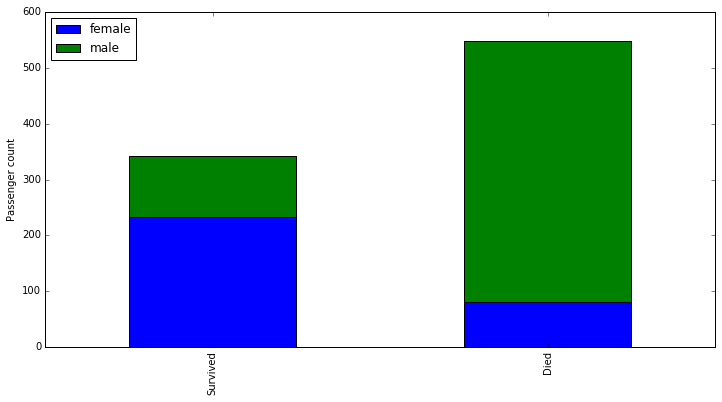

In [29]:
surv_sex = data[data['Survived']==1]['Sex'].value_counts()
died_sex = data[data['Survived']==0]['Sex'].value_counts()
df = pd.DataFrame([surv_sex,died_sex])
df.index = ['Survived','Died']
df.plot(kind='bar',stacked=True, figsize=(12,6))
plt.ylabel('Passenger count')

There is a strong correlation between gender and survival. 

In [178]:
a = data.groupby(['Sex','Survived']).size()
d_ = pd.DataFrame.from_items([('Sex', ['Female', 'Male']), ('Survived(%)', [a[1]/float(a[0]+a[1])*100 , a[3]/float(a[3]+a[2])*100])])
print d_.to_string(index=False)

Sex  Survived(%)
Female    74.203822
  Male    18.890815


### 1.2 Survival based on 'Age': ###

For now, we replace the missing values in the 'Age' column by the gender-based median value. 
We will get back to this later with a more sophisticated approach. 

In [27]:
male_data = data[data['Sex'] == 'male']
female_data = data[data['Sex'] == 'female']
male_age_median = male_data['Age'].median()
female_age_median = female_data['Age'].median()
male_data['Age'].fillna(male_age_median, inplace=True)
female_data['Age'].fillna(female_age_median, inplace=True)
data = pd.concat([male_data,female_data])

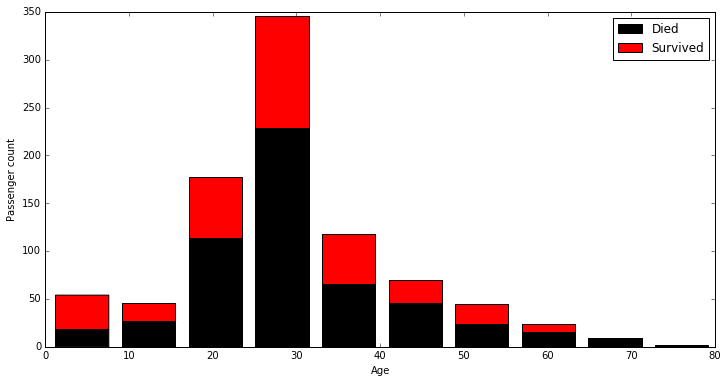

In [60]:
figure = plt.figure(figsize=(12,6))
died_age = data[data['Survived']==0]['Age']
surv_age = data[data['Survived']==1]['Age']
plt.hist([died_age,surv_age], stacked=True, bins=10, color = ['k','r'],label = ['Died','Survived'])
plt.xlabel('Age')
plt.ylabel('Passenger count')
plt.legend()

Age also seems to be an influential factor on the survival chance of passengers. 
Infants had a higher chance of survival.

### 1.3 Survival based on 'Fare' (ticket price): ###

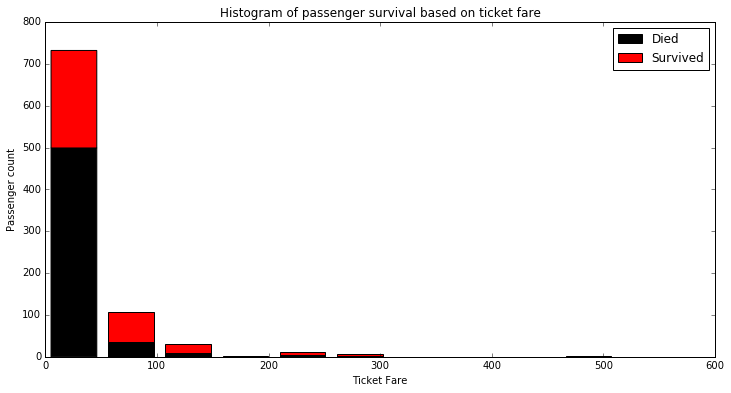

In [39]:
figure = plt.figure(figsize=(12,6))
died_age = data[data['Survived']==0]['Fare']
surv_age = data[data['Survived']==1]['Fare']
plt.hist([died_age,surv_age], stacked=True, color = ['k','r'], bins = 10,label = ['Died','Survived'])
plt.xlabel('Ticket Fare')
plt.ylabel('Passenger count')
plt.title('Histogram of passenger survival based on ticket fare')
plt.legend()

People with lowest ticket price had a slim chance of survival. This can be further investigated by looking at the three classes.

### 1.4 Survival based on 'Pclass' (ticket class): ###

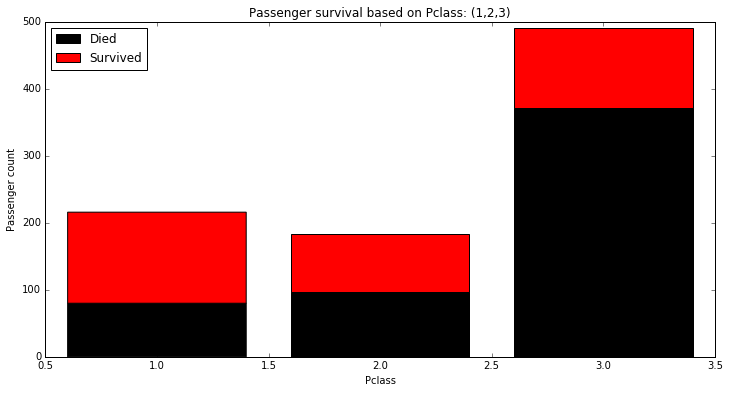

In [64]:
# Pclass 3: lowest class (cheapest tickets)
# Pclass 1: highest class (most expensive tickets)
figure = plt.figure(figsize=(12,6))
died_pclass = data[data['Survived']==0]['Pclass']
surv_pclass = data[data['Survived']==1]['Pclass']
plt.hist([died_pclass,surv_pclass], stacked=True, color = ['k','r'], bins=[0.5,1.5,2.5,3.5],label = ['Died','Survived'])
plt.xlabel('Pclass')
plt.ylabel('Passenger count')
plt.title('Passenger survival based on Pclass: (1,2,3)')
plt.legend(loc='upper left')

Let's compute the survival rate percentage using only Pclass. 
We, first, group the dataset using 'Survived' and 'Pclass' columns. 

In [177]:
a_ = data.groupby(['Pclass', 'Survived']).size()
a = a_.get_values()
print a_

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
dtype: int64


Chance of survival based on Pclass (1: highest class, 3: lowest class):

In [176]:
d_ = pd.DataFrame.from_items([('Pclass', [1,2,3]), ('Survived(%)', [a[1]/float(a[0]+a[1])*100 , a[3]/float(a[3]+a[2])*100, a[5]/float(a[5]+a[4])*100])])
print d_.to_string(index=False)

Pclass  Survived(%)
     1    62.962963
     2    47.282609
     3    24.236253


### 1.5 Survival based on 'Embarked' (C,S,Q): ###

In [91]:
# Define this function to convert letters to numeric values.
def embarked_to_numeric(x):
    if x=='C':
        return 1
    if x=='S':
        return 2
    if x=='Q':
        return 3
# Add a new column to convert letters to numeric values. 
data['EmbarkedN'] = data['Embarked'].apply(embarked_to_numeric)

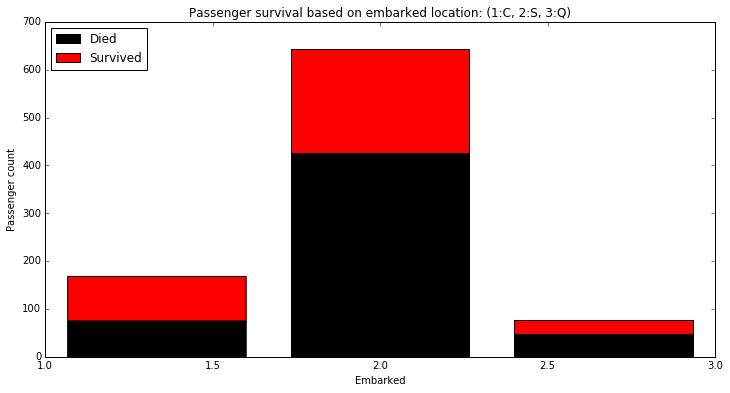

In [95]:
figure = plt.figure(figsize=(12,6))
died_embarked = data[data['Survived']==0]['EmbarkedN']
surv_embarked = data[data['Survived']==1]['EmbarkedN']
plt.hist([died_embarked,surv_embarked], stacked=True, color = ['k','r'],bins=3, label = ['Died','Survived'])
plt.xlabel('Embarked')
plt.ylabel('Passenger count')
plt.title('Passenger survival based on embarked location: (1:C, 2:S, 3:Q)')
plt.legend(loc='upper left')

There seems to be a correlation based on the embarked location. People who boarded from location C (1), had a higher survival rate.

In [81]:
data.groupby(['Embarked', 'Survived']).size()

Embarked  Survived
C         0            75
          1            93
Q         0            47
          1            30
S         0           427
          1           217
dtype: int64

In [179]:
d_ = pd.DataFrame.from_items([('Embarked', ['C', 'Q', 'S']), ('Survived(%)', [55 , 39, 34])])
print d_.to_string(index=False)

Embarked  Survived(%)
      C           55
      Q           39
      S           34


# Conclusion of part 1: #

We observe strong correlation in : 'Age', 'Sex', 'Fare', and 'Pclass'. 
Some correlation is also observed based on 'Embarked' feature.